# Link Theory Simulation Notebook  
This notebook demonstrates key simulations underpinning Link Theory: a geometric model of cortical resilience. We model triangle motifs as the brain’s structural units and observe how they respond to repeated stress and overload.

In [3]:
# Link Theory Simulation Notebook

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random



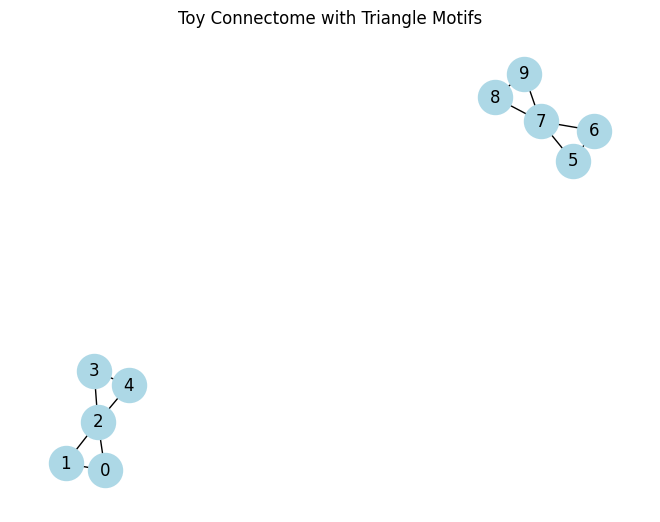

In [4]:
# Create adjacency matrix
adj = np.zeros((10, 10), dtype=int)
edges = [
    (0,1), (1,2), (2,0),
    (2,3), (3,4), (4,2),
    (5,6), (6,7), (7,5),
    (7,8), (8,9), (9,7)
]
for u, v in edges:
    adj[u, v] = 1
    adj[v, u] = 1

# Build graph from adjacency
G = nx.from_numpy_array(adj)
nx.draw(G, with_labels=True, node_color='lightblue', node_size=600)
plt.title("Toy Connectome with Triangle Motifs")
plt.show()


Stressing node: 5


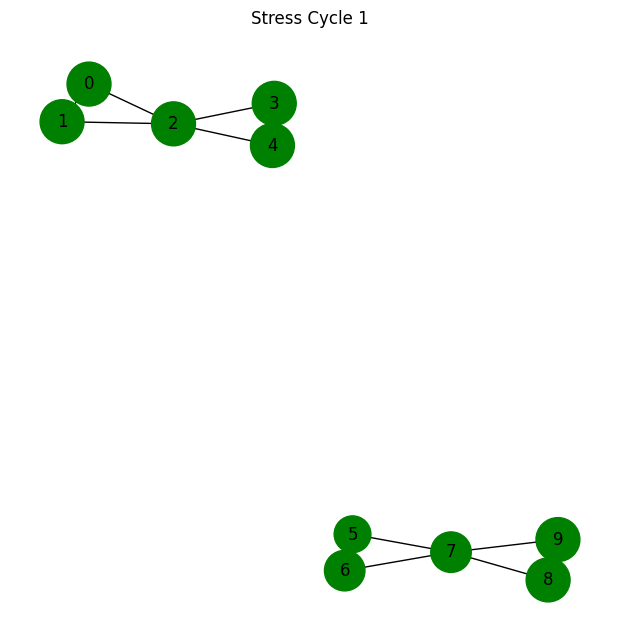

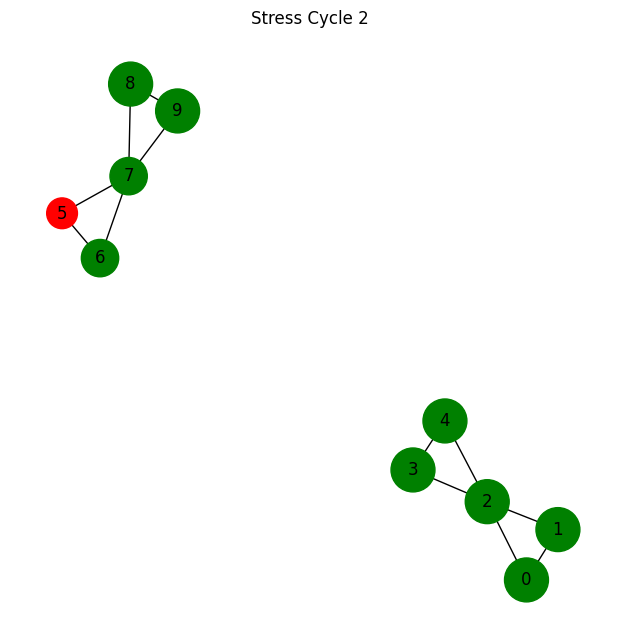

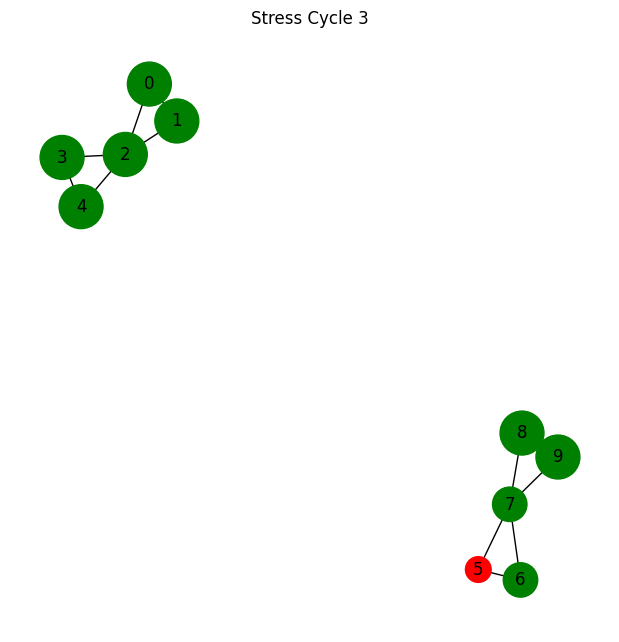

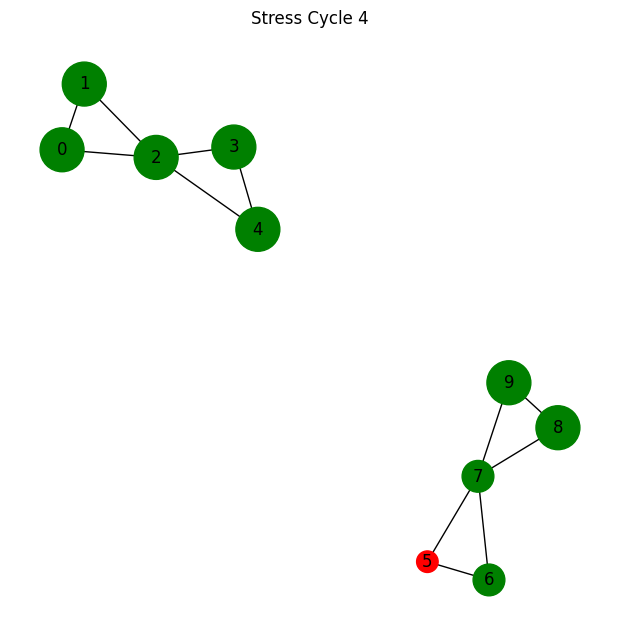

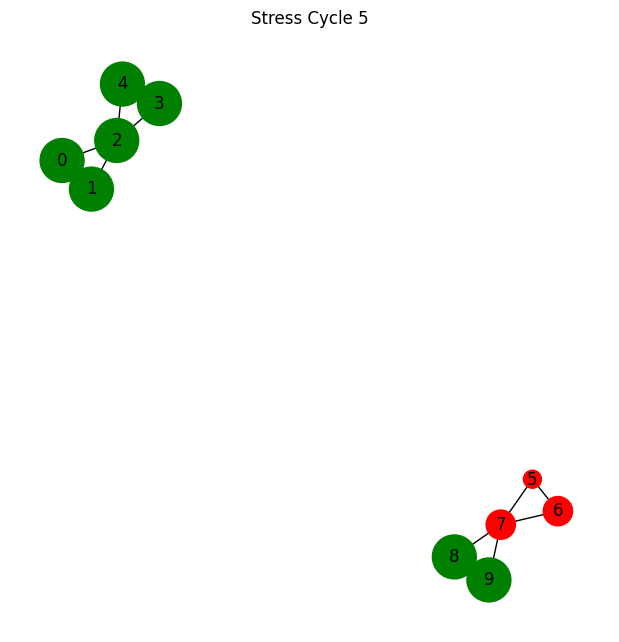

In [5]:
# Initialize node strengths
strength = {n: 1.0 for n in G.nodes()}
target = random.choice(list(G.nodes()))
print("Stressing node:", target)

for cycle in range(5):
    strength[target] *= 0.7
    for neighbor in G.neighbors(target):
        strength[neighbor] *= 0.85

    colors = ['red' if strength[n] < 0.5 else 'green' for n in G.nodes()]
    sizes = [strength[n]*1000 for n in G.nodes()]

    plt.figure(figsize=(6,6))
    nx.draw(G, with_labels=True, node_color=colors, node_size=sizes)
    plt.title(f"Stress Cycle {cycle+1}")
    plt.show()


In [6]:
# Find triangle motifs
triangles = [list(t) for t in nx.enumerate_all_cliques(G) if len(t) == 3]
print("Triangle motifs found:", triangles)


Triangle motifs found: [[0, 1, 2], [2, 3, 4], [5, 6, 7], [7, 8, 9]]


### Simulation Summary:
- A toy brain network was created with known triangle motifs.
- We simulated stress on a single node, decreasing its functional capacity over time.
- Connected nodes also degraded due to network load sharing.
- Visualization shows how local collapse might propagate if resilience is weak.
